<a href="https://colab.research.google.com/github/Giorgiovanni12/Global-Arena-Research-Institute-GARI-TASK-1/blob/main/Global_Arena_Research_Institute_(GARI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
'''
Install all the necessary python libraries

Data Pre-processing and Cleaning:

Load the retrieved data into a Pandas DataFrame for easy manipulation.
Examine the structure of the dataset, identify missing values, and handle them appropriately (imputation or removal).
Convert data types if needed, handle duplicates, and ensure the dataset is in a usable format for analysis.
Data Analysis and Visualization:

Group the dataset by countries and calculate overall exports and imports for each country.
Create a group of the top 10 countries most involved in international trade in services and another group of the bottom 10 countries least involved.
Use data visualization tools like Matplotlib to create visualizations supporting the choice of the top and bottom 10 countries.
Plot the development of trade over the years for these countries to observe trends and variations.'''

In [66]:
#Install python libraries

!pip install pandas
!pip install matplotlib

!pip install flask
!pip install flask pyngrok



<ipython-input-64-18f6d463fa73>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


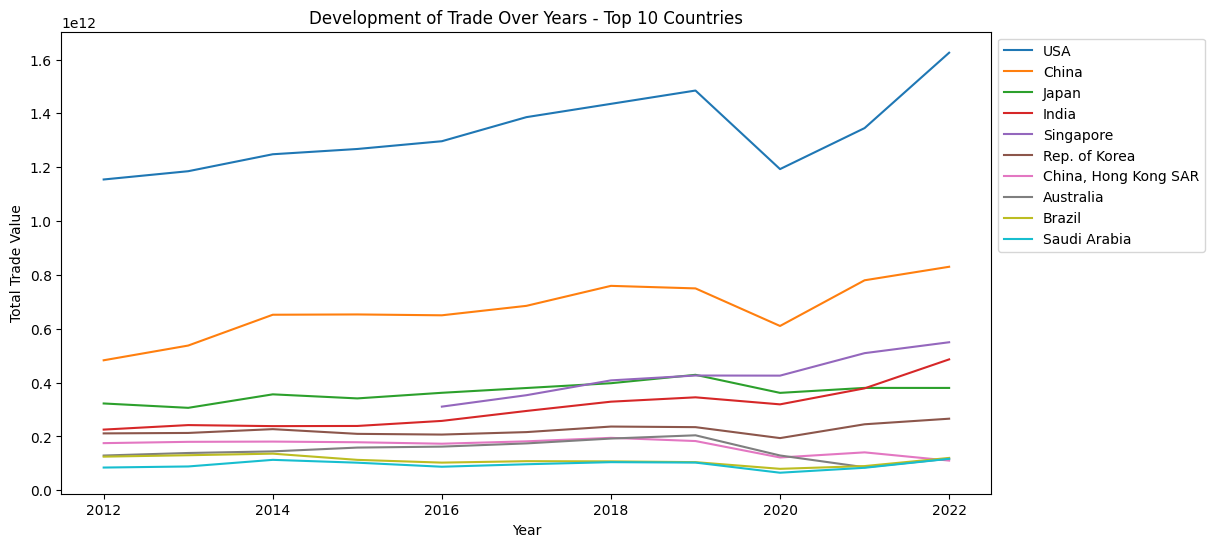

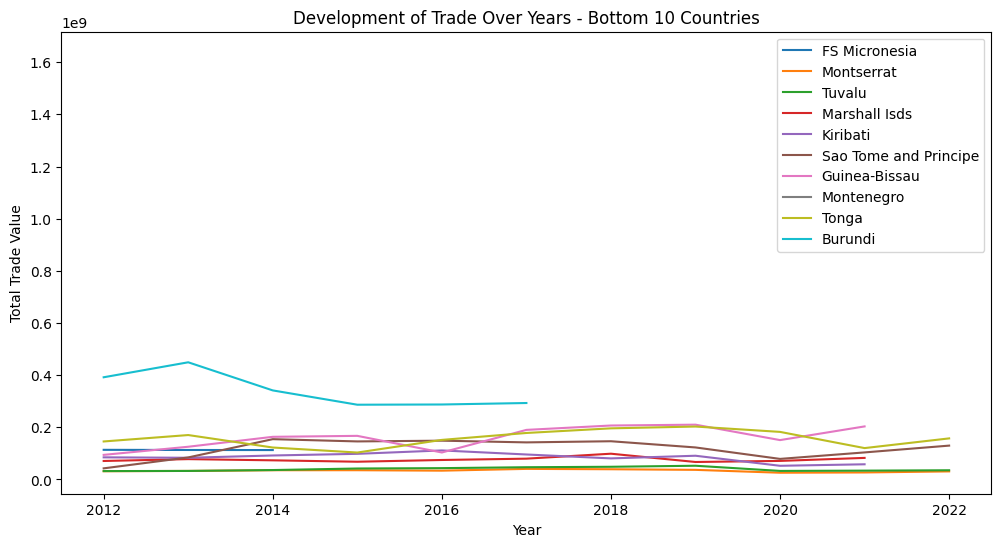

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset into a DataFrame
df = pd.read_csv('/content/TradeData_1_3_2024_14_43_7.csv', encoding='ISO-8859-1')

#Clear the dataset and rename properties
df = df.rename(columns={'ReporterDesc': 'Country', 'Cifvalue': 'TotalTradeValue'})
df = df.fillna(df.mean())
df = df.drop_duplicates()
# Group by 'Country' and sum the 'TotalTradeValue'
country_total_trade = df.groupby(['Country', 'RefYear'])['TotalTradeValue'].sum().reset_index()

# Find the top 10 and bottom 10 countries
top_10_countries = country_total_trade.groupby('Country')['TotalTradeValue'].sum().nlargest(10).index
bottom_10_countries = country_total_trade.groupby('Country')['TotalTradeValue'].sum().nsmallest(10).index

# Filter the data for the top 10 and bottom 10 countries
top_10_data = country_total_trade[country_total_trade['Country'].isin(top_10_countries)]
bottom_10_data = country_total_trade[country_total_trade['Country'].isin(bottom_10_countries)]

# Visualize the development of trade over years for the top 10 countries
plt.figure(figsize=(12, 6))

for country in top_10_countries:
    country_data = top_10_data[top_10_data['Country'] == country]
    plt.plot(country_data['RefYear'], country_data['TotalTradeValue'], label=country)

plt.title('Development of Trade Over Years - Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Visualize the development of trade over years for the bottom 10 countries
plt.figure(figsize=(12, 6))

for country in bottom_10_countries:
    country_data = bottom_10_data[bottom_10_data['Country'] == country]
    plt.plot(country_data['RefYear'], country_data['TotalTradeValue'], label=country)

plt.title('Development of Trade Over Years - Bottom 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



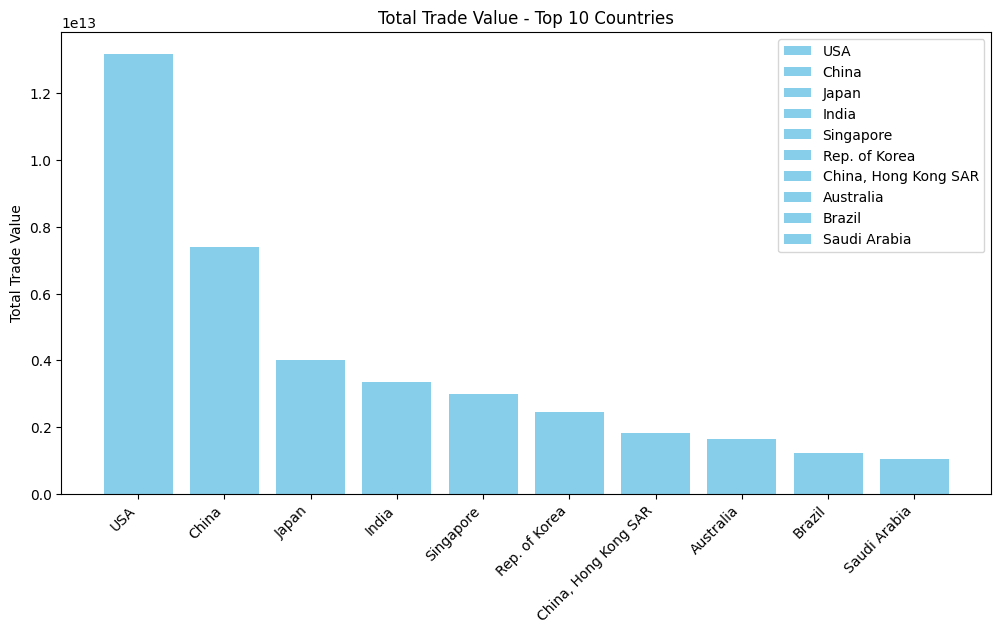

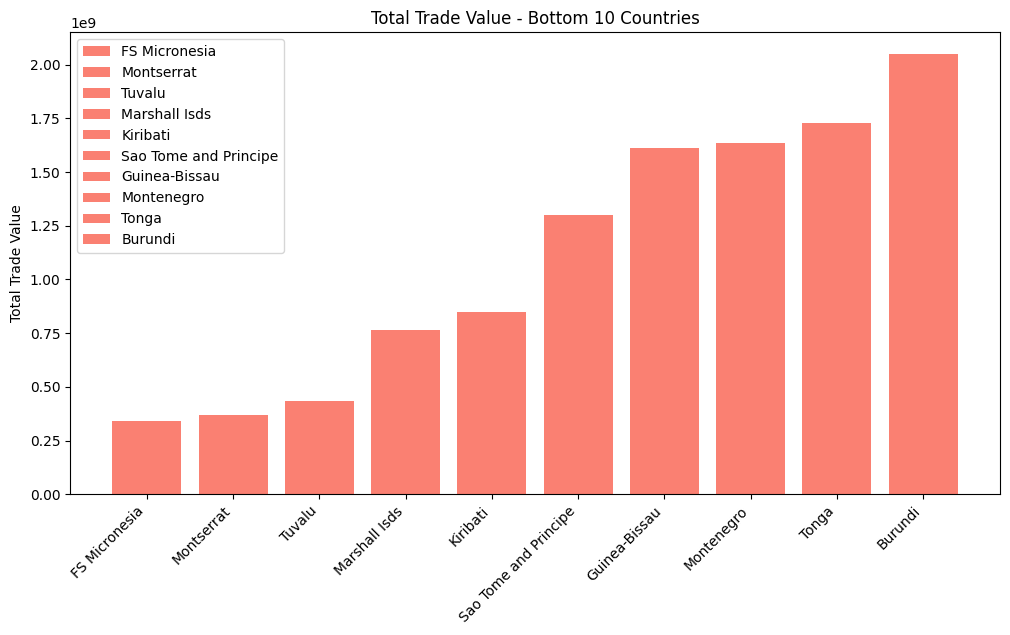

In [65]:

# Plot bar charts for the top 10 countries
plt.figure(figsize=(12, 6))
for i, country in enumerate(top_10_countries):
    country_data = top_10_data[top_10_data['Country'] == country]
    plt.bar(i, country_data['TotalTradeValue'].sum(), color='skyblue', label=country)

plt.title('Total Trade Value - Top 10 Countries')
plt.ylabel('Total Trade Value')
plt.xticks(range(len(top_10_countries)), top_10_countries, rotation=45, ha='right')  # Rotate labels
plt.legend()
plt.show()

# Plot bar charts for the bottom 10 countries
plt.figure(figsize=(12, 6))
for i, country in enumerate(bottom_10_countries):
    country_data = bottom_10_data[bottom_10_data['Country'] == country]
    plt.bar(i, country_data['TotalTradeValue'].sum(), color='salmon', label=country)

plt.title('Total Trade Value - Bottom 10 Countries')
plt.ylabel('Total Trade Value')
plt.xticks(range(len(bottom_10_countries)), bottom_10_countries, rotation=45, ha='right')  # Rotate labels
plt.legend()
plt.show()
